In [1]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d.axes3d import Axes3D
np.random.seed(0)

In [2]:
mu_vec1 = np.array([0,0,0])
cov_mat1 = np.array([[1,0,0], [0,1,0], [0,0,1]])

In [3]:
class1_sample = np.random.multivariate_normal(mu_vec1, cov_mat1, 20).T
class1_sample.shape

(3, 20)

In [4]:
mu_vec2 = np.array([1,1,1]) # sample mean
cov_mat2 = np.array([[1,0,0],[0,1,0],[0,0,1]]) #sample covariance
class2_sample = np.random.multivariate_normal(mu_vec2, cov_mat2, 20).T

In [5]:
fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(111, projection='3d')

In [6]:
plt.rcParams['legend.fontsize'] = 10

In [7]:
# plot samples
ax.plot(class1_sample[0, :], class1_sample[1, :], class1_sample[2, :], 'o',
        markersize=8, color='blue', alpha=0.5, label='class1')
ax.plot(class2_sample[0, :], class2_sample[1, :], class2_sample[2, :],  '^',
        markersize=8, color='green', alpha=0.5, label='class2')

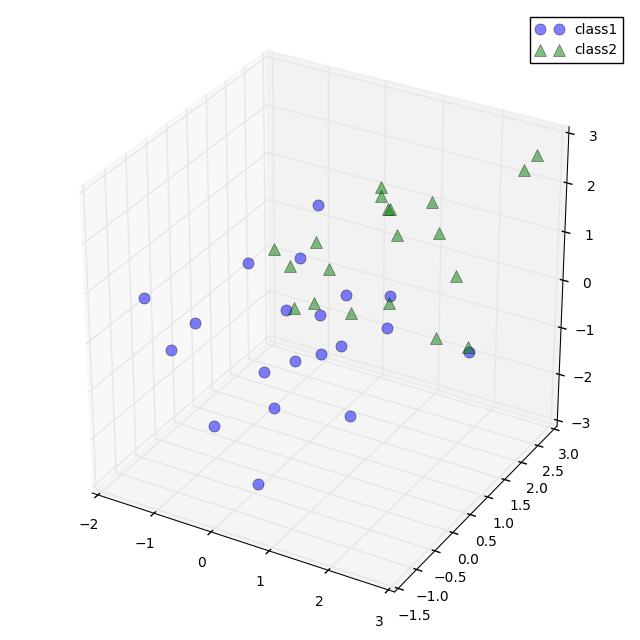

In [8]:
ax.legend(loc='upper right')
plt.show()

# PCA

In [18]:
# Step 1 - Use the whole dataset
all_samples = np.concatenate((class1_sample, class2_sample), axis=1)
all_samples.shape

(3, 40)

In [19]:
# Step 2 - Compute mean
mean_x = np.mean(all_samples[0, :])
mean_y = np.mean(all_samples[1, :])
mean_z = np.mean(all_samples[2, :])


In [11]:
mean_vector = np.array([[mean_x], [mean_y], [mean_z]])

In [20]:
# Step 3 - Compute covariance matrix
cov_mat = np.cov([all_samples[0, :], all_samples[1, :], all_samples[2, :]])

In [21]:
# Step 4 - Compute eigen values for the covariance matrix
eig_val, eig_vec = np.linalg.eig(cov_mat)


In [14]:
for i in range(len(eig_vec)):
    print "Eigen vector", eig_vec[:, i].reshape(1,3).T
    print "Eigen value", eig_val[i]

Eigen vector [[-0.5690384 ]
 [-0.51164745]
 [-0.64374854]]
Eigen value 2.29290547481
Eigen vector [[-0.62675178]
 [ 0.77664688]
 [-0.06326004]]
Eigen value 1.07218190984
Eigen vector [[-0.53233213]
 [-0.36747315]
 [ 0.76261785]]
Eigen value 0.847993992474


In [15]:
eig_pairs = [(np.abs(eig_val[i]),eig_vec[:, i]) for i in range(len(eig_val))]

In [22]:
# Step 5 - Sort the eigen values in decreasing order
eig_pairs.sort()
eig_pairs.reverse()

In [17]:
for i in eig_pairs:
    print i

(2.2929054748077595, array([-0.5690384 , -0.51164745, -0.64374854]))
(1.0721819098427545, array([-0.62675178,  0.77664688, -0.06326004]))
(0.84799399247363305, array([-0.53233213, -0.36747315,  0.76261785]))


In [24]:
# Choose 2 vectors with largest eigen values as the directions of projection
matrix_w = np.hstack((eig_pairs[0][1].reshape(3,1), eig_pairs[1][1].reshape(3,1)))

In [25]:
matrix_w.shape

(3, 2)

In [26]:
transformed = matrix_w.T.dot(all_samples)
print(transformed.shape)

(2, 40)


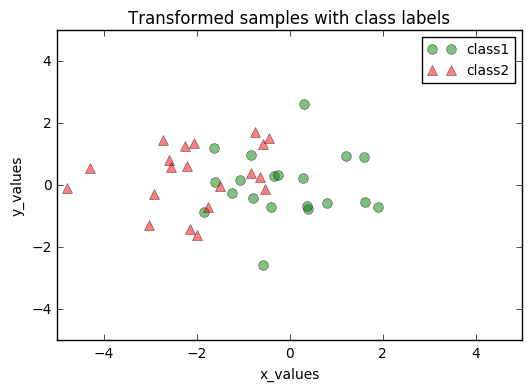

In [27]:
plt.plot(transformed[0,0:20], transformed[1,0:20],
         'o', markersize=7, color='green', alpha=0.5, label='class1')
plt.plot(transformed[0,20:40], transformed[1,20:40],
         '^', markersize=7, color='red', alpha=0.5, label='class2')
plt.xlim([-5,5])
plt.ylim([-5,5])
plt.xlabel('x_values')
plt.ylabel('y_values')
plt.legend()
plt.title('Transformed samples with class labels')

plt.show()